In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
import os
os.chdir("C:\\Users\\i2013\\OneDrive\\바탕 화면\\투빅스\\강의\\1주\\1wk_Logistic")

data = pd.read_csv('assignment_2.csv')
data['salary']=data['salary'].apply(lambda x : x/10000)
data.head()

,Label,bias,experience,salary
0,1,1,0.7,4.8
1,0,1,1.9,4.8
2,1,1,2.5,6.0
3,0,1,4.2,6.3
4,0,1,6.0,7.6


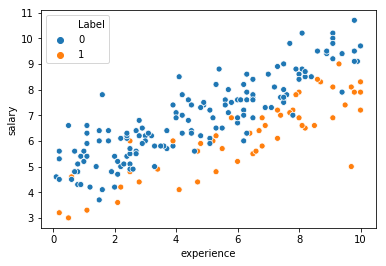

In [6]:
import seaborn as sns
sns.scatterplot(x = data.experience, y = data.salary, hue = data.Label)

In [57]:
#Features
X = data.iloc[:,1:].values
print("Shape of X :", X.shape)

#label
y = data.iloc[:, 0].values.reshape(-1,1)
print("Shape of y :",y.shape)

Shape of X : (200, 3)
Shape of y : (200, 1)


In [111]:
def sigmoid(input):
    return 1 / (1 + np.exp(-input))

def Gradient_Descending(x, y, learning_rate, literation):
    beta = np.random.normal(size = X.shape[1]).reshape(-1,1)
    P = sigmoid(np.dot(X,beta))
    for i in range(literation):
        if i % 10000 == 0:
            loss = sum(-(y*sigmoid(x.dot(beta)) + (1-y)*(1-sigmoid(x.dot(beta)))))
            print("Loss : ", loss)
        beta += learning_rate * X.T.dot(y - P)
        P = sigmoid(np.dot(X,beta))
    return beta

In [112]:
beta = Gradient_Descending(X, y, 0.01, 100000)

Loss :  [-147.24791986]
Loss :  [-166.84900862]
Loss :  [-166.84901587]
Loss :  [-166.84901587]
Loss :  [-166.84901587]
Loss :  [-166.84901587]
Loss :  [-166.84901587]
Loss :  [-166.84901587]
Loss :  [-166.84901587]
Loss :  [-166.84901587]


In [113]:
# filter out the applicants that got admitted
MALE = data[data['Label']==1]
FEMALE = data[data['Label'] == 0]

C:\Users\i2013\AppData\Local\conda\conda\envs\ML\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


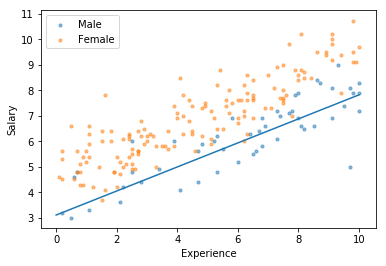

In [114]:
fig = plt.figure()
plt.scatter(MALE.iloc[:, 2], MALE.iloc[:, 3], s=10, label='Male',alpha=0.5)
plt.scatter(FEMALE.iloc[:, 2], FEMALE.iloc[:, 3], s=10, label='Female',alpha=0.5)
#plt.scatter(X[:,1], X[:,2],c=T , s=10, alpha=0.8)
x_axis = np.linspace(0, 10, 100)
y_axis = -(beta[0] + x_axis*beta[1]) / beta[2]

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Experience')
ax.set_ylabel('Salary')
plt.plot(x_axis, y_axis)
plt.legend()
plt.show()